# Auto MPG Data Set

# Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

# Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

# Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing Dataset

In [68]:
data=pd.read_csv('auto-mpg.csv')

In [69]:
data.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
95,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham
96,18.0,6,225.0,105.0,3121.0,16.5,73,1,plymouth valiant
97,16.0,6,250.0,100.0,3278.0,18.0,73,1,chevrolet nova custom
98,18.0,6,232.0,100.0,2945.0,16.0,73,1,amc hornet


# Feature Information

In [70]:
# mpg - Milieage/Miles Per Galon
# cylinders - the power unit of the car where gasoline is turned into power
# displacement - engine displacement of the car
# horsepower - rate of the engine performance
# weight - the weight of a car
# acceleration - the acceleration of a car
# model - model of the car
# origin - the origin of the car 
# car - the name of the car

In [71]:
data.shape

(392, 9)

# Null/Missing Value Analysis

Checking the null/missing value is the first and required step in the EDA analyis. Finding Null/Missing value and handling them contributes in the better performance of the model.

In [72]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

We cannot find any Null/Missing values in this data

In [74]:
data.drop(['carname'],axis=1,inplace=True)

# Familiarisation with the DataSet

In [75]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [76]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
modelyear       392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


# Data Visualisation Using plots

# Histogram Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A16FCF3940>,
      dtype=object)

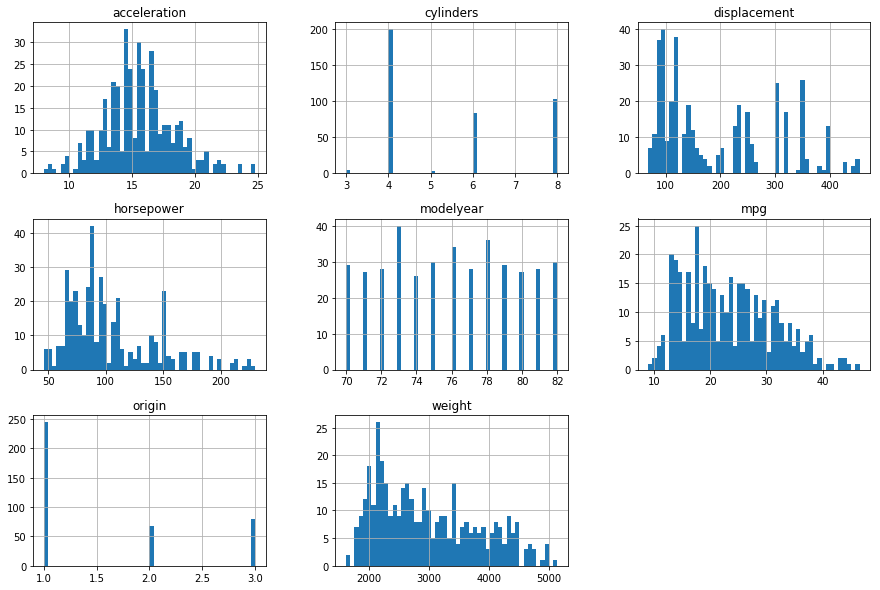

In [20]:
data.hist(bins=50,figsize=(15,10))

# BoxPlot
The Box plot will help us to identify the outliers in the dataset, if our dataset has significant outliers then those will treated with the help of several techniques.

Lets Check for the outliers!

Box Plots for the Attributes


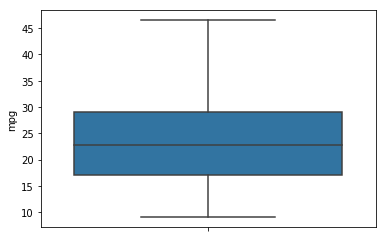

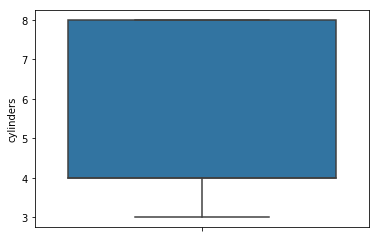

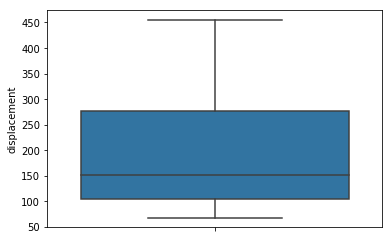

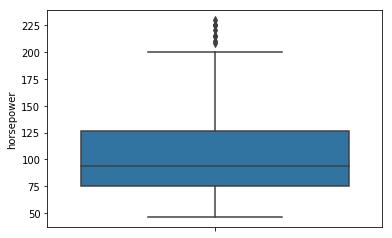

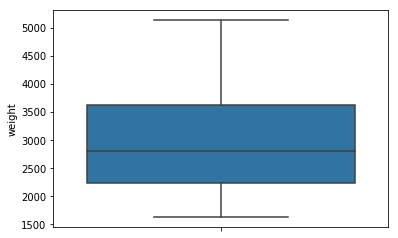

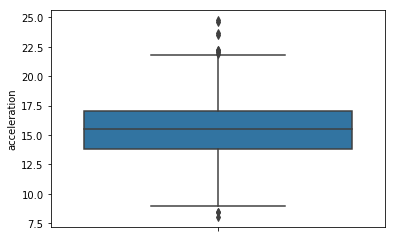

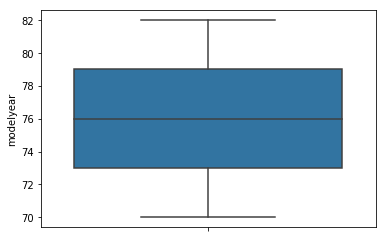

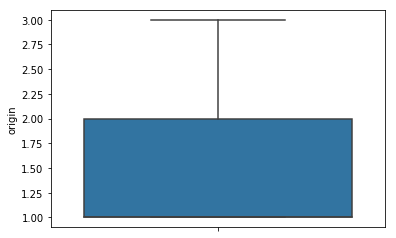

In [22]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
print("Box Plots for the Attributes")
for val in columns:
    sns.boxplot(y=val,data=data)
    plt.show()

# Line Plot

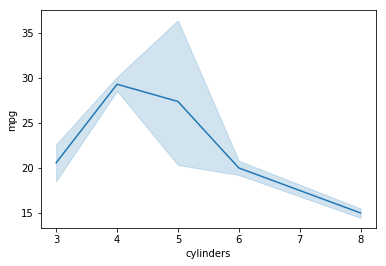

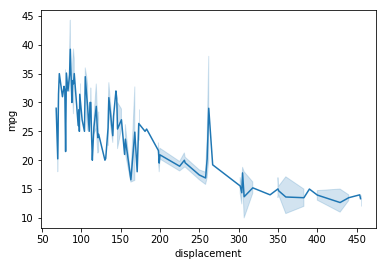

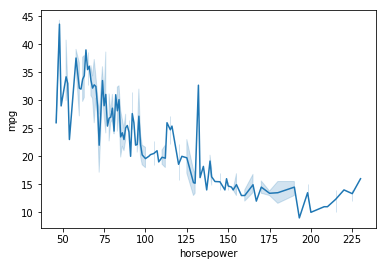

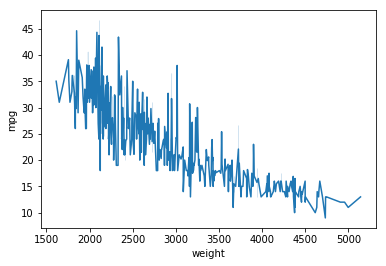

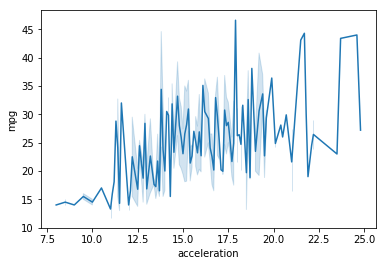

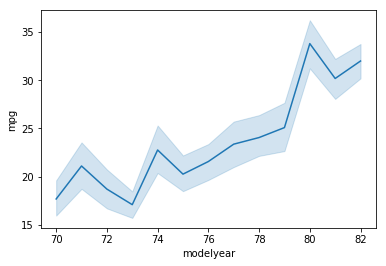

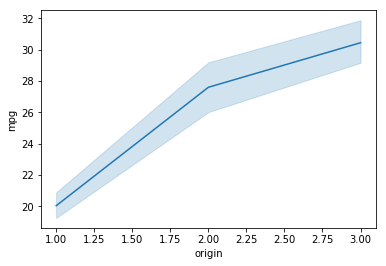

In [11]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
attr=list(data.columns[1:])
for val in attr:
    sns.lineplot(x=val,y='mpg',data=data)
    plt.show()

# Regression Plots

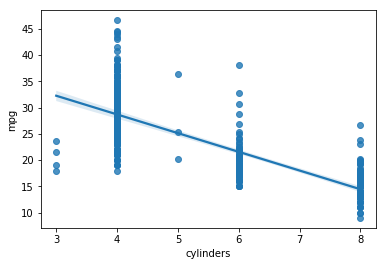

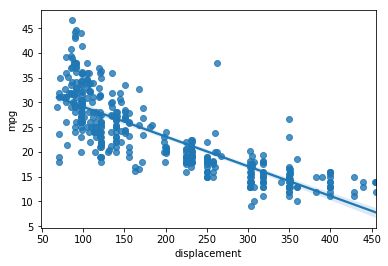

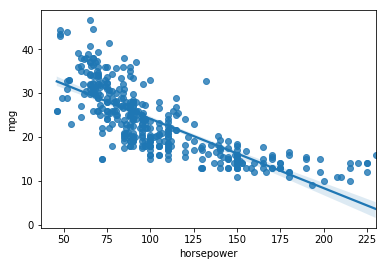

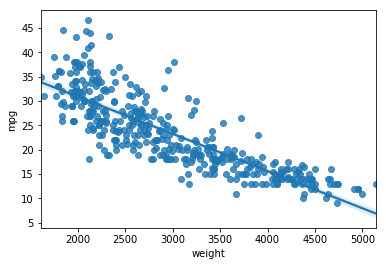

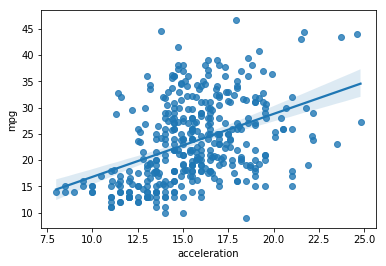

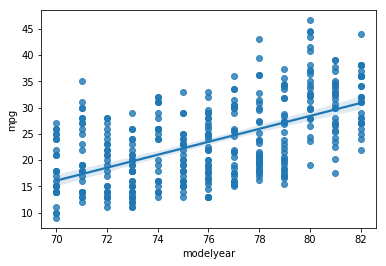

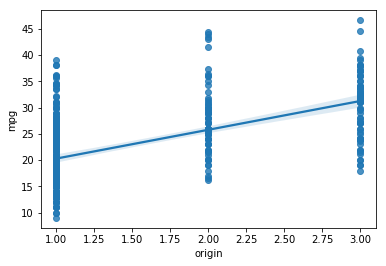

In [12]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
attr=list(data.columns[1:])
for val in attr:
    sns.regplot(x=val,y='mpg',data=data)
    plt.show()

From the above visualisation we can see some feature like acceleration , model year are positively linearly related and other feature are inversely related

# PairPlot

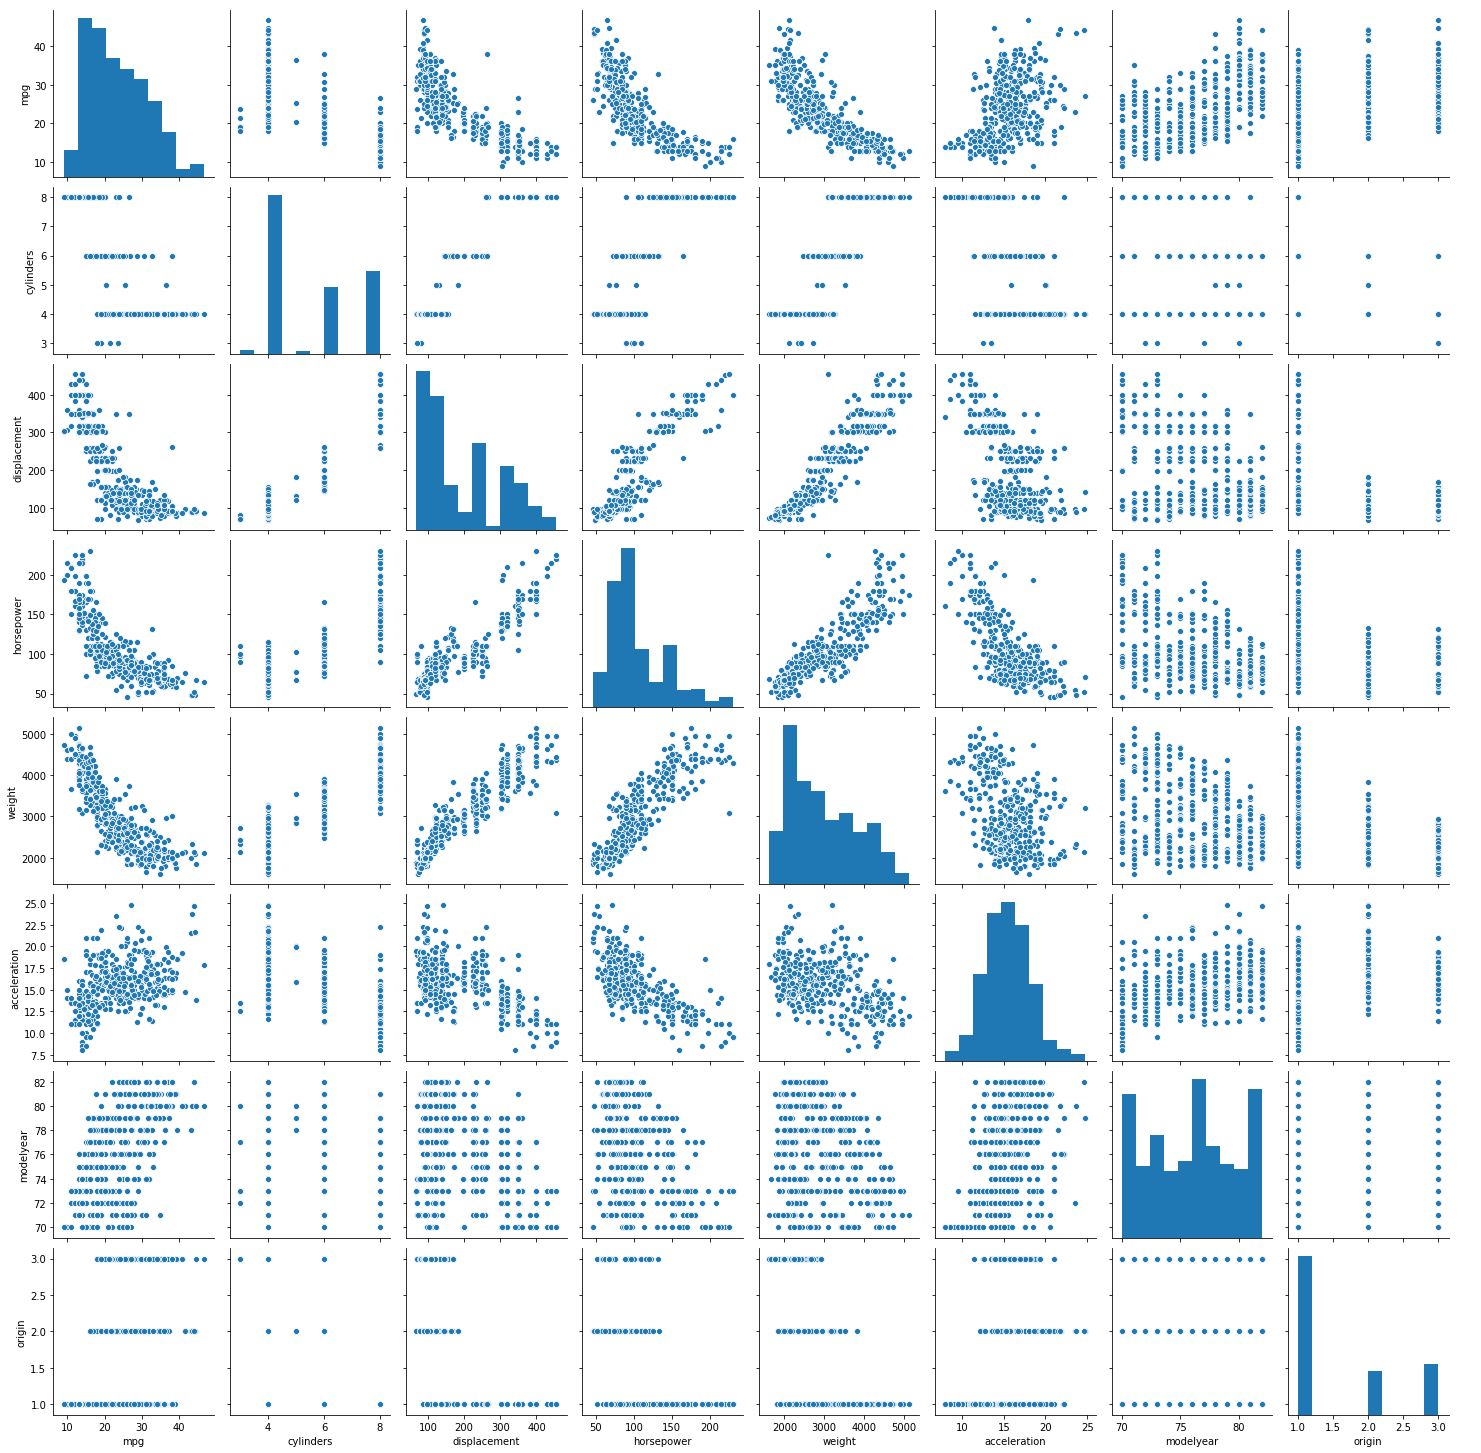

In [19]:
sns.pairplot(data)

# Skewness

In [78]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
modelyear       0.019688
origin          0.915185
dtype: float64

In [79]:
from scipy import stats
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

Here in this section skewness is analysed and as skewness (>0.5) which can  be seen  in some features is treated in this section using log transformation . We will also be using scaling technique to remove the skewness in this project

In [80]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
modelyear       0.019688
origin          0.790401
dtype: float64

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

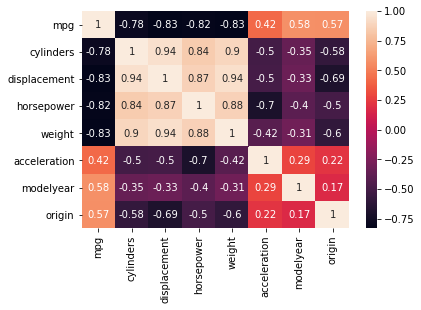

In [81]:
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [82]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

By looking into the shape after performing feature selection using CorRelation ,it is been found that some correlation co_efficient are greater than 0.9 there , after removing those feature we have new shape for the data.

In [83]:
data.shape

(392, 6)

In [84]:
data.head(5)

,mpg,cylinders,horsepower,acceleration,modelyear,origin
0,18.0,8,4.875197,12.0,70,0.693147
1,15.0,8,5.111988,11.5,70,0.693147
2,18.0,8,5.017280,11.0,70,0.693147
3,16.0,8,5.017280,12.0,70,0.693147
4,17.0,8,4.948760,10.5,70,0.693147


# Handling Outliers

In [85]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[0.69863841, 1.48394702, 0.81453267, 1.285258  , 1.62531533,
        0.73689439],
       [1.08349824, 1.48394702, 1.51191473, 1.46672362, 1.62531533,
        0.73689439],
       [0.69863841, 1.48394702, 1.23298616, 1.64818924, 1.62531533,
        0.73689439],
       ...,
       [1.09737414, 0.86401356, 0.45937786, 1.4304305 , 1.63640964,
        0.73689439],
       [0.5842277 , 0.86401356, 0.63792611, 1.11008813, 1.63640964,
        0.73689439],
       [0.96908753, 0.86401356, 0.52950365, 1.40043312, 1.63640964,
        0.73689439]])

In [86]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (392, 6)
shape of the data without  outliers   (390, 6)


 In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (390, 6) . Now this will be our finalised Dataset for modelling.

# Standard Scaling the data for normalisation

In [99]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df)

In [100]:
x=pd.DataFrame(x)

In [101]:
x.columns=[i for i in df.columns]

In [102]:
x.head()

,mpg,cylinders,horsepower,acceleration,modelyear,origin
0,-0.695302,1.47857,0.809793,-1.302413,-1.62186,-0.732388
1,-1.082758,1.47857,1.509280,-1.488772,-1.62186,-0.732388
2,-0.695302,1.47857,1.229510,-1.675131,-1.62186,-0.732388
3,-0.953606,1.47857,1.229510,-1.302413,-1.62186,-0.732388
4,-0.824454,1.47857,1.027100,-1.861491,-1.62186,-0.732388


# Separating input and output variables

In [103]:
y=x['mpg']
x=x.drop(['mpg'],axis=1)

# Applying Various Regression Models

In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score


2) Root mean sqaure Error 

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

In [94]:
#importing the libraries
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [95]:
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score

In [116]:
from sklearn.model_selection import cross_val_score
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    rmse=cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error').mean()
    print('mean cross_val_score using RMSE as a scoring parameter',rmse)
    return rmse

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [112]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# 1.Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)

The maximum r2 score  is 0.8664559296513403 at random state 72


# Plotting the predicted vs actual

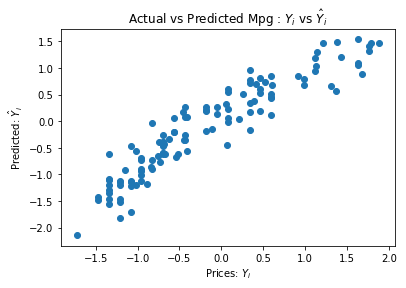

In [114]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=72)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [115]:
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.5868555652941503
std deviation of cross_val_score 0.20605515717528494


In [117]:
RMSE=rmse(lreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using RMSE as a scoring parameter -0.20728491022004922


# 2.KNeighborsRegressor

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(-10,10)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 5}

In [127]:
knr=KNeighborsRegressor(n_neighbors=5)
Final_r_state=max_r2_score(knr,x,y)


The maximum r2 score  is 0.8967847885106941 at random state 87


# Plotting the predicted vs actual

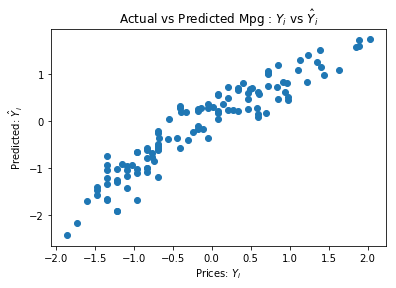

In [126]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=87)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [128]:
print('mean cross_val_score using R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(knr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.6837942228677929
std deviation of cross_val_score using  R2 as parameter 0.19808599645819375
mean cross_val_score using RMSE as a scoring parameter -0.17224672363834276


# 3. Lasso Regression

In [129]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [130]:
lsreg=Lasso(alpha=0.001)
Final_r_state=max_r2_score(lsreg,x,y)



The maximum r2 score  is 0.8665897902853298 at random state 72


# Plotting the predicted vs actual

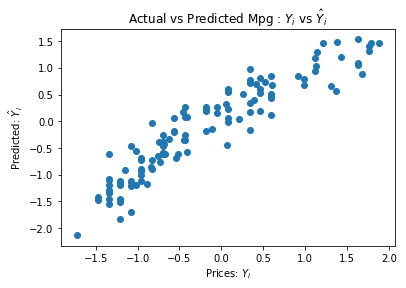

In [131]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=72)
Y_pred = lsreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [132]:
print('mean cross_val_score using R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.586606821145973
std deviation of cross_val_score using  R2 as parameter 0.20629824489062348
mean cross_val_score using RMSE as a scoring parameter -0.20735001425587543


# 4.DecisionTreeRegressor

In [133]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(-10,10)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 5}

In [134]:
DT=DecisionTreeRegressor(max_depth=5)
Final_r_state=max_r2_score(DT,x,y)

The maximum r2 score  is 0.8562605222740717 at random state 77


# Plotting the predicted vs actual

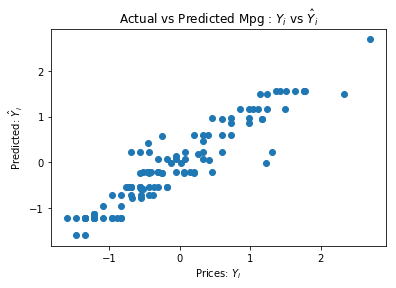

In [135]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=77)
Y_pred = DT.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [136]:
print('mean cross_val_score using R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(DT,x,y,cv=5,scoring='r2').std())
RMSE=rmse(DT,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.4881475350824019
std deviation of cross_val_score using  R2 as parameter 0.49808453208516373
mean cross_val_score using RMSE as a scoring parameter -0.18360729766482514


# Appying ensemble model for better results

# 1.GradientBoostingRegressor

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [141]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
Final_r_state=max_r2_score(gbr,x,y)

The maximum r2 score  is 0.8991530752201617 at random state 77


# Plotting the predicted vs actual

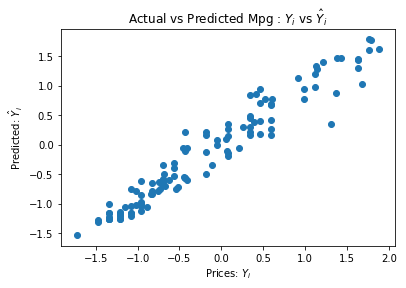

In [142]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=72)
Y_pred = gbr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [143]:
print('mean cross_val_score using R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.7731724333974328
std deviation of cross_val_score using  R2 as parameter 0.14180502902947775
mean cross_val_score using RMSE as a scoring parameter -0.1488966134816279


# 2.AdaBoostRegressor

In [144]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 1000}

In [145]:
ad=AdaBoostRegressor(learning_rate=0.01,n_estimators=1000,base_estimator=DT)
Final_r_state=max_r2_score(ad,x,y)

The maximum r2 score  is 0.9068415675501629 at random state 77


# Plotting the predicted vs actual

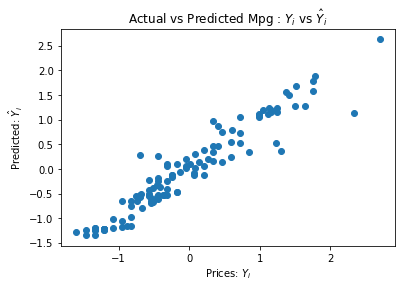

In [146]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=77)
Y_pred = ad.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted Mpg : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [147]:
print('mean cross_val_score using R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').std())
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.7074051663180347
std deviation of cross_val_score using  R2 as parameter 0.2090427474863389
mean cross_val_score using RMSE as a scoring parameter -0.154519678074487


In [148]:
print(List_rmse)

[-0.20728491022004922, -0.17224672363834276, -0.20735001425587543, -0.18360729766482514, -0.1488966134816279, -0.154519678074487]


# Plotting Bargraph to Analyse the Performance Matrix

In [149]:
model_list=['linearRegression',' KNR','LASSO','DTR','GBR','ADABOOST']

Text(0.5,1,'BarPlot between RMSE and Models')

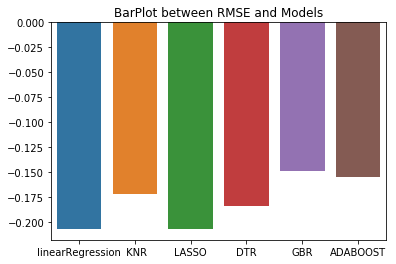

In [150]:
sns.barplot(x=model_list,y=List_rmse)
plt.title("BarPlot between RMSE and Models")

In [151]:
maxm_r2=['0.86','0.89','0.86','0.85','0.89','0.90']

Text(0.5,1,'BarPlot between R2-Score and Models')

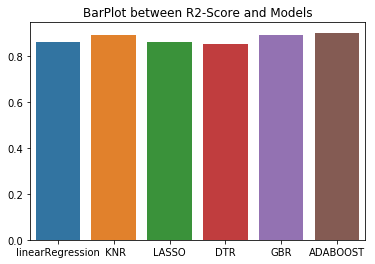

In [152]:
sns.barplot(x=model_list,y=maxm_r2)
plt.title("BarPlot between R2-Score and Models")

After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that GradientBoostingRegressor is giving the best results which are as follows :

The maximum r2 score  is 0.8991530752201617 at random state 77

mean cross_val_score using R2 as parameter 0.7731724333974328
std deviation of cross_val_score using  R2 as parameter 0.14180502902947775
mean cross_val_score using RMSE as a scoring parameter -0.1488966134816279

Therefore GradientBoostingRegressor is selected as our final model

# FINAL MODEL

In [153]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=77)
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [154]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

RMSE 0.29443892787411574
r2_score 0.8990890642257408
mean cross_val_score 0.7735531822905061
std deviation of cross_val_score 0.1418974468911625


In [156]:
from sklearn.externals import joblib
joblib.dump(gbr,"GBR_MPG_Prediction.pkl")

['GBR_MPG_Prediction.pkl']

# Conclusion

The project is about prducted the mileage per gallon which is dependent on several features given below :-

 mpg - Milieage/Miles Per Galon
 
 cylinders - the power unit of the car where gasoline is turned into power
 
 displacement - engine displacement of the car
 
 horsepower - rate of the engine performance
 
 weight - the weight of a car
 
 acceleration - the acceleration of a car
 
 model - model of the car
 
 origin - the origin of the car 
 
 car - the name of the car.

So as per the work we have performed the null value analysis , EDA and aslo handled the outliers .

In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix we have selected GradientBoostingRegressor  as our Final model. as r2 score for this is maximum .

At last we have saved the final model using joblib.